In [ ]:
!pip install notebook pandas scikit-learn miceforest matplotlib numpy seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('sensor_failure.csv', na_values="na")

In [4]:
df.shape

(36188, 171)

In [5]:
df['class'].value_counts()

neg    35188
pos     1000
Name: class, dtype: int64

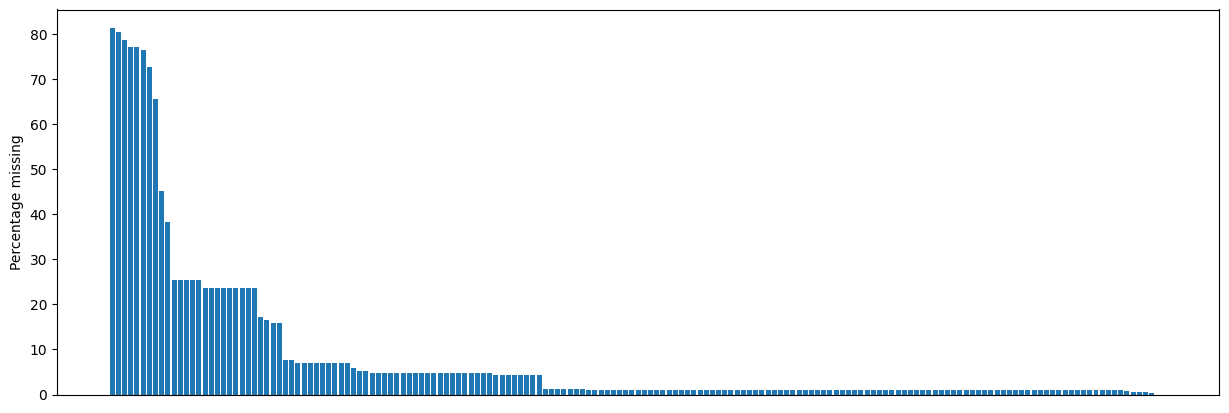

In [6]:
# Plotting Missing values count for each column
fig, ax = plt.subplots(figsize=(15,5))

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()


In [7]:
## Dropping columns which has more than 70% of missing values
dropcols = missing[missing[0]>70]
dropcols

,0
br_000,81.410965
bq_000,80.501824
bp_000,78.794075
ab_000,77.086327
cr_000,77.086327
bo_000,76.533658
bn_000,72.761689


In [8]:
df.drop(list(dropcols.index), axis=1, inplace=True)

In [9]:
df.shape

(36188, 164)

In [10]:
missing_values_count= df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
print(f"Percentage of total missing cells in the data {(total_missing/total_cells) * 100}%")

Percentage of total missing cells in the data 5.37059852747306%


In [11]:
# Splitting X and y for all Experiments
X = df.drop('class', axis=1)
y = df['class']

In [12]:
y = y.replace({'pos': 1, 'neg': 0})

<h1>Imputation</h1>

In [15]:
X

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,153204,1.820000e+02,NaN,0.0,0.0,0.0,0.0,0.0,11804.0,684444.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,453236,2.926000e+03,NaN,0.0,0.0,0.0,0.0,222.0,323436.0,2999280.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,72504,1.594000e+03,1052.0,0.0,0.0,0.0,244.0,178226.0,1249396.0,3813464.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,762958,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,8123016.0,18022646.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,695994,NaN,NaN,NaN,NaN,0.0,0.0,0.0,55620.0,1190014.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36183,153002,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,2564.0,59100.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
36184,2286,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,0.0,104.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
36185,112,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
36186,80292,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,0.0,330.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [14]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')
imputer.fit_transform(X.loc[:5000])

array([[1.53204000e+05, 1.82000000e+02, 8.59333333e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.53236000e+05, 2.92600000e+03, 2.69000000e+03, ...,
        6.91400000e+03, 0.00000000e+00, 0.00000000e+00],
       [7.25040000e+04, 1.59400000e+03, 1.05200000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.77720000e+04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.68000000e+02, 2.13070643e+09, 6.00000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [18]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')

In [21]:
cols = X.columns
X_mean_impute = mean_imputer.fit_transform(X)
X_mean_impute = DataFrame(X_mean_impute, columns=cols)
X_mean_impute

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,153204.0,1.820000e+02,318544.695346,0.0000,0.000000,0.0,0.0,0.0,11804.0,684444.0,...,1.298620e+05,2.687200e+04,3.404400e+04,2.247200e+04,3.436200e+04,0.000000,0.000000,0.00000,0.000000,0.000000
1,453236.0,2.926000e+03,318544.695346,0.0000,0.000000,0.0,0.0,222.0,323436.0,2999280.0,...,7.908038e+06,3.026002e+06,5.025350e+06,2.025766e+06,1.160638e+06,533834.000000,493800.000000,6914.00000,0.000000,0.000000
2,72504.0,1.594000e+03,1052.000000,0.0000,0.000000,0.0,244.0,178226.0,1249396.0,3813464.0,...,1.432098e+06,3.722520e+05,5.275140e+05,3.582740e+05,3.328180e+05,284178.000000,3742.000000,0.00000,0.000000,0.000000
3,762958.0,3.535223e+08,318544.695346,7.2343,11.606543,776.0,281128.0,2186308.0,8123016.0,18022646.0,...,4.853621e+05,2.293208e+05,4.837846e+05,4.401019e+05,3.686943e+05,371805.139323,148511.679522,8897.66433,0.083464,0.209234
4,695994.0,3.535223e+08,318544.695346,7.2343,11.606543,0.0,0.0,0.0,55620.0,1190014.0,...,1.397742e+06,4.955440e+05,3.616460e+05,2.861000e+04,5.130000e+03,212.000000,0.000000,0.00000,0.083464,0.209234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36183,153002.0,6.640000e+02,186.000000,0.0000,0.000000,0.0,0.0,0.0,2564.0,59100.0,...,9.985000e+05,5.668840e+05,1.290398e+06,1.218244e+06,1.019768e+06,717762.000000,898642.000000,28588.00000,0.000000,0.000000
36184,2286.0,2.130707e+09,224.000000,0.0000,0.000000,0.0,0.0,0.0,0.0,104.0,...,1.057800e+04,6.760000e+03,2.112600e+04,6.842400e+04,1.360000e+02,0.000000,0.000000,0.00000,0.000000,0.000000
36185,112.0,2.130706e+09,18.000000,0.0000,0.000000,0.0,0.0,0.0,0.0,28.0,...,7.920000e+02,3.860000e+02,4.520000e+02,1.440000e+02,1.460000e+02,2622.000000,0.000000,0.00000,0.000000,0.000000
36186,80292.0,2.130706e+09,494.000000,0.0000,0.000000,0.0,0.0,0.0,0.0,330.0,...,6.993520e+05,2.226540e+05,3.473780e+05,2.257240e+05,1.944400e+05,165070.000000,802280.000000,388422.00000,0.000000,0.000000


In [17]:
X.describe()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.938000e+03,6.385000e+03,5011.000000,6532.000000,6532.000000,6866.000000,6.866000e+03,6.866000e+03,6.866000e+03,6.866000e+03,...,6.865000e+03,6.865000e+03,6.865000e+03,6.865000e+03,6.865000e+03,6.865000e+03,6.865000e+03,6.865000e+03,6495.000000,6495.000000
mean,9.878105e+04,3.440504e+08,498.426661,6.877526,13.749541,240.223711,4.579877e+03,3.347029e+04,2.407968e+05,8.556927e+05,...,7.143032e+05,3.311542e+05,6.958805e+05,6.703159e+05,5.465906e+05,4.871709e+05,1.964612e+05,1.096883e+04,0.069284,0.332564
std,2.306175e+05,7.840886e+08,1782.437744,98.589813,244.367718,8077.558032,8.638372e+04,3.130253e+05,1.367106e+06,3.469232e+06,...,1.826418e+06,8.664888e+05,1.836737e+06,2.053909e+06,1.698104e+06,1.991822e+06,7.185971e+05,5.504337e+04,1.902004,8.614611
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.082500e+03,1.600000e+01,26.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.845000e+02,...,3.450000e+03,1.408000e+03,3.574000e+03,5.022000e+03,7.280000e+02,1.740000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.378300e+04,1.600000e+02,138.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,5.383000e+03,...,2.658360e+05,1.268160e+05,2.581980e+05,2.215220e+05,1.235700e+05,5.482800e+04,7.566000e+03,0.000000e+00,0.000000,0.000000
75%,6.027500e+04,1.080000e+03,463.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,7.816000e+04,...,5.062760e+05,2.472420e+05,5.416760e+05,4.641080e+05,3.183700e+05,1.976720e+05,1.503680e+05,2.026000e+03,0.000000,0.000000
max,2.746564e+06,2.130707e+09,60466.000000,3478.000000,13562.000000,544866.000000,4.109372e+06,1.055286e+07,2.904730e+07,5.396293e+07,...,2.376624e+07,1.162899e+07,2.700915e+07,5.743524e+07,3.160781e+07,3.317055e+07,1.456059e+07,1.562444e+06,84.000000,430.000000


In [18]:
X_median_impute = median_imputer.fit_transform(X)
X_median_impute = DataFrame(X_median_impute, columns=cols)
X_median_impute

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,153204.0,1.820000e+02,138.0,0.0,0.0,0.0,0.0,0.0,11804.0,684444.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,453236.0,2.926000e+03,138.0,0.0,0.0,0.0,0.0,222.0,323436.0,2999280.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,72504.0,1.594000e+03,1052.0,0.0,0.0,0.0,244.0,178226.0,1249396.0,3813464.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,762958.0,1.600000e+02,138.0,0.0,0.0,776.0,281128.0,2186308.0,8123016.0,18022646.0,...,265836.0,126816.0,258198.0,221522.0,123570.0,54828.0,7566.0,0.0,0.0,0.0
4,695994.0,1.600000e+02,138.0,0.0,0.0,0.0,0.0,0.0,55620.0,1190014.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6933,41076.0,6.680000e+02,630.0,0.0,0.0,0.0,0.0,0.0,0.0,8946.0,...,211480.0,101090.0,190386.0,227026.0,179910.0,195658.0,516288.0,18726.0,0.0,0.0
6934,40062.0,1.280000e+02,96.0,0.0,0.0,0.0,0.0,0.0,0.0,746.0,...,302950.0,155108.0,327096.0,419052.0,432910.0,97616.0,18280.0,10.0,0.0,0.0
6935,38934.0,1.960000e+02,190.0,0.0,0.0,0.0,0.0,0.0,0.0,772.0,...,337478.0,172264.0,309874.0,293838.0,196818.0,170614.0,213874.0,21314.0,0.0,0.0
6936,94878.0,5.660000e+02,526.0,0.0,0.0,0.0,0.0,0.0,82.0,42984.0,...,861286.0,377734.0,772894.0,627418.0,484858.0,346728.0,677636.0,29760.0,0.0,0.0


In [19]:
import miceforest as mf

X_mice = X.copy()
kernel = mf.ImputationKernel(
  X_mice[:20],
  save_all_iterations=True,
  random_state=42
)

kernel.mice(3)

In [20]:
kernel.complete_data()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,153204,182.0,856.0,0.0,0.0,0.0,0.0,0.0,11804.0,684444.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,453236,2926.0,464.0,0.0,0.0,0.0,0.0,222.0,323436.0,2999280.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,72504,1594.0,1052.0,0.0,0.0,0.0,244.0,178226.0,1249396.0,3813464.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,762958,6982.0,5922.0,0.0,0.0,776.0,281128.0,2186308.0,8123016.0,18022646.0,...,2428526.0,713608.0,1365076.0,2025766.0,4096660.0,2777986.0,220478.0,3730.0,0.0,0.0
4,695994,6982.0,1388.0,0.0,0.0,0.0,0.0,0.0,55620.0,1190014.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,0.0,0.0
5,1056758,42328.0,856.0,0.0,0.0,0.0,50394.0,184552.0,2116260.0,8359268.0,...,1450086.0,713608.0,1750894.0,4054554.0,4096660.0,2295880.0,220478.0,482.0,0.0,0.0
6,361638,280.0,856.0,0.0,0.0,0.0,0.0,0.0,0.0,193768.0,...,266410.0,114746.0,180006.0,108294.0,111218.0,264410.0,33734.0,0.0,0.0,0.0
7,791254,3762.0,1100.0,0.0,0.0,0.0,14868.0,921256.0,9292232.0,17829808.0,...,3625532.0,1380864.0,3262488.0,5727988.0,7563752.0,12114820.0,264714.0,198.0,0.0,0.0
8,1053152,6982.0,1052.0,0.0,0.0,2.0,2.0,30.0,192.0,37434.0,...,7093206.0,3379622.0,7362340.0,8442584.0,8120144.0,5082396.0,6259760.0,176752.0,0.0,0.0
9,785270,6982.0,8994.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
def get_imputed_data() -> DataFrame:
  X_median_impute = median_imputer.fit_transform(X)
  X_median_impute = DataFrame(X_median_impute, columns=cols)
  return X_median_impute

In [22]:
X = get_imputed_data()

<h1>Scaling</h1>

In [23]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
X_scaled = pd.DataFrame(X_scaled,columns = cols)

In [26]:
X_scaled

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.531885,-0.430089,-0.005262,-0.037942,-0.048415,-0.010482,-0.034323,-0.069060,-0.116578,0.074357,...,-0.282815,-0.340050,-0.359131,-0.313243,-0.272911,-0.214945,-0.286650,-0.166463,-0.021495,-0.023703
1,2.359994,-0.430086,-0.005262,-0.037942,-0.048415,-0.010482,-0.034323,-0.067821,0.237245,1.015509,...,5.950495,4.727836,3.650607,1.198608,0.654386,0.096556,0.676253,-0.035742,-0.021495,-0.023703
2,0.040177,-0.430088,-0.005242,-0.037942,-0.048415,-0.010482,-0.028711,0.925447,1.288569,1.346535,...,0.760777,0.243568,0.037296,-0.059819,-0.027183,-0.049122,-0.279353,-0.166463,-0.021495,-0.023703
3,4.247144,-0.430089,-0.005262,-0.037942,-0.048415,0.031621,6.430805,12.130610,9.092794,7.123616,...,-0.196275,-0.193188,-0.204638,-0.182852,-0.222497,-0.189874,-0.278308,-0.166463,-0.021495,-0.023703
4,3.839130,-0.430089,-0.005262,-0.037942,-0.048415,-0.010482,-0.034323,-0.069060,-0.066830,0.279909,...,0.733245,0.451905,-0.095953,-0.308610,-0.296978,-0.214822,-0.286650,-0.166463,-0.021495,-0.023703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36183,0.530655,-0.430089,-0.005261,-0.037942,-0.048415,-0.010482,-0.034323,-0.069060,-0.127069,-0.179891,...,0.413298,0.572454,0.650154,0.589186,0.538403,0.203882,1.465690,0.374039,-0.021495,-0.023703
36184,-0.387665,2.325100,-0.005260,-0.037942,-0.048415,-0.010482,-0.034323,-0.069060,-0.129981,-0.203878,...,-0.378407,-0.374035,-0.369508,-0.278564,-0.301090,-0.214945,-0.286650,-0.166463,-0.021495,-0.023703
36185,-0.400911,2.325100,-0.005265,-0.037942,-0.048415,-0.010482,-0.034323,-0.069060,-0.129981,-0.203909,...,-0.386250,-0.384806,-0.386117,-0.330093,-0.301082,-0.213416,-0.286650,-0.166463,-0.021495,-0.023703
36186,0.087629,2.325100,-0.005254,-0.037942,-0.048415,-0.010482,-0.034323,-0.069060,-0.129981,-0.203786,...,0.173566,-0.009221,-0.107416,-0.159852,-0.141114,-0.118624,1.277785,7.177268,-0.021495,-0.023703


In [28]:
MinMaxscaler = MinMaxScaler((0,1))
X_MinMaxscaled = MinMaxscaler.fit_transform(X)

In [29]:
X_MinMaxscaled = pd.DataFrame(X_MinMaxscaled,columns=cols)

In [30]:
X_MinMaxscaled

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.055780,8.541767e-08,1.491095e-08,0.0,0.0,0.00000,0.000000,0.000000,0.000406,1.268360e-02,...,0.004158,0.001602,0.001239,0.000391,0.001087,0.000000,0.000000,0.000000,0.0,0.0
1,0.165019,1.373253e-06,1.491095e-08,0.0,0.0,0.00000,0.000000,0.000021,0.011135,5.558038e-02,...,0.253197,0.180449,0.182889,0.035270,0.036720,0.014320,0.025629,0.001815,0.0,0.0
2,0.026398,7.481086e-07,1.225493e-07,0.0,0.0,0.00000,0.000059,0.016889,0.043012,7.066821e-02,...,0.045852,0.022198,0.019198,0.006238,0.010530,0.007623,0.000194,0.000000,0.0,0.0
3,0.277786,7.133783e-08,1.491095e-08,0.0,0.0,0.00023,0.068411,0.207177,0.279648,3.339820e-01,...,0.007615,0.006785,0.008238,0.003399,0.003024,0.001153,0.000222,0.000000,0.0,0.0
4,0.253405,7.133783e-08,1.491095e-08,0.0,0.0,0.00000,0.000000,0.000000,0.001915,2.205243e-02,...,0.044752,0.029551,0.013161,0.000498,0.000162,0.000006,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36183,0.055707,3.116337e-07,2.166747e-08,0.0,0.0,0.00000,0.000000,0.000000,0.000088,1.095196e-03,...,0.031970,0.033805,0.046962,0.021211,0.032263,0.019254,0.046641,0.007503,0.0,0.0
36184,0.000832,9.999999e-01,2.609416e-08,0.0,0.0,0.00000,0.000000,0.000000,0.000000,1.927249e-06,...,0.000339,0.000403,0.000769,0.001191,0.000004,0.000000,0.000000,0.000000,0.0,0.0
36185,0.000041,9.999999e-01,2.096852e-09,0.0,0.0,0.00000,0.000000,0.000000,0.000000,5.188747e-07,...,0.000025,0.000023,0.000016,0.000003,0.000005,0.000070,0.000000,0.000000,0.0,0.0
36186,0.029234,9.999999e-01,5.754693e-08,0.0,0.0,0.00000,0.000000,0.000000,0.000000,6.115309e-06,...,0.022392,0.013277,0.012642,0.003930,0.006152,0.004428,0.041639,0.101946,0.0,0.0


In [31]:
robust_scaler = RobustScaler()

In [32]:
X_robust_scaled = robust_scaler.fit_transform(X,y)

In [33]:
X_robust_scaled = pd.DataFrame(X_robust_scaled,columns= cols)

In [34]:
X_robust_scaled

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,2.483167,3.665241e-02,0.000000,0.0,0.0,0.0,0.0,0.0,11804.0,13.419412,...,-0.245219,-0.395877,-0.410632,-0.428152,-0.221862,-0.254236,-0.030442,0.000000,0.0,0.0
1,8.581068,3.389126e+00,0.000000,0.0,0.0,0.0,0.0,222.0,323436.0,59.058023,...,17.417460,13.264909,10.247002,4.536167,3.858981,2.904536,3.483399,3.560247,0.0,0.0
2,0.843006,1.761759e+00,3.756098,0.0,0.0,0.0,244.0,178226.0,1249396.0,75.110230,...,2.711898,1.177300,0.643045,0.403991,0.859535,1.427286,-0.003814,0.000000,0.0,0.0
3,14.875911,0.000000e+00,0.000000,0.0,0.0,776.0,281128.0,2186308.0,8123016.0,355.254195,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,13.514923,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,55620.0,23.387078,...,2.633882,1.738885,0.288877,-0.412942,-0.327779,-0.252982,-0.030442,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36183,2.479061,6.255345e-01,0.235772,0.0,0.0,0.0,0.0,0.0,2564.0,1.090318,...,1.727284,2.063833,2.271985,2.535064,3.348566,3.992864,6.364221,14.720906,0.0,0.0
36184,-0.584117,2.603184e+06,0.390244,0.0,0.0,0.0,0.0,0.0,0.0,-0.072830,...,-0.516089,-0.487485,-0.438215,-0.314280,-0.345874,-0.254236,-0.030442,0.000000,0.0,0.0
36185,-0.628301,2.603184e+06,-0.447154,0.0,0.0,0.0,0.0,0.0,0.0,-0.074328,...,-0.538311,-0.516518,-0.482359,-0.483483,-0.345837,-0.238721,-0.030442,0.000000,0.0,0.0
36186,1.001291,2.603184e+06,1.487805,0.0,0.0,0.0,0.0,0.0,0.0,-0.068374,...,1.047979,0.495894,0.258411,0.075522,0.358149,0.722507,5.678517,200.011329,0.0,0.0


In [35]:
def get_scaled_data() -> DataFrame:
  X_robust = robust_scaler.fit_transform(X)
  X_robust = pd.DataFrame(X_robust, columns=cols)
  return X_robust

<h1>Data Imbalance</h1>

In [36]:
X = get_scaled_data()

In [37]:
#resampling using SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=42,sampling_strategy='minority', n_jobs=-1 )
X_res, y_res = smt.fit_resample(X, y)

print('Resampled dataset shape %s' % Counter(y_res))

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Resampled dataset shape Counter({1: 35188, 0: 35188})


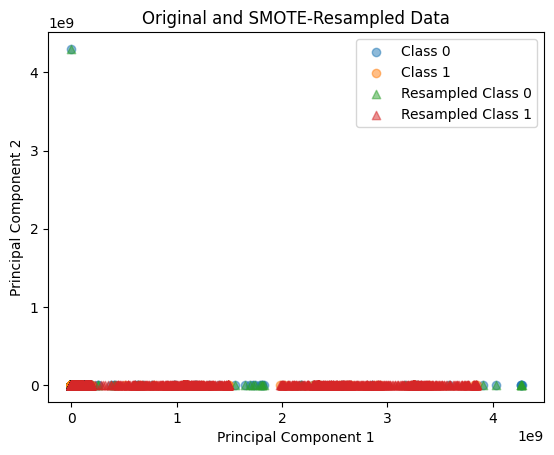

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_resampled_pca = pca.transform(X_res)

plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], label='Class 0', alpha=0.5)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], label='Class 1', alpha=0.5)

# Plot resampled data
plt.scatter(X_resampled_pca[y_res == 0, 0], X_resampled_pca[y_res == 0, 1], label='Resampled Class 0', marker='^', alpha=0.5)
plt.scatter(X_resampled_pca[y_res == 1, 0], X_resampled_pca[y_res == 1, 1], label='Resampled Class 1', marker='^', alpha=0.5)

plt.title('Original and SMOTE-Resampled Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()